In [1]:
using CSV
using DataFrames
using Plots

# Read alignment tables of R&D58

In [2]:
#df = CSV.read("file.csv", DataFrame) ## a faster way
rd58_df = DataFrame(CSV.File("S94_RD58_stat_summary.xls"))
rd58_50bp_df = DataFrame(CSV.File("S94_RD58_50bp_stat_summary.xls"))
rd58_50bp_1m_df = DataFrame(CSV.File("S94_RD58_50bp_1M_stat_summary.xls"))
rd58_50bp_2m_df = DataFrame(CSV.File("S94_RD58_50bp_2M_stat_summary.xls"))
rd58_50bp_5m_df = DataFrame(CSV.File("S94_RD58_50bp_5M_stat_summary.xls"))

,sample,species,reads,ribo_reads,ercc_reads,ercc_reads(%)
,String,String,Int64,String,String,String
1,RD58-100pg_S7_50bp_5M_L002,Mus_musculus,5000000,NA,NA,NA
2,RD58-10ng_S10_50bp_5M_L002,Mus_musculus,5000000,NA,NA,NA
3,RD58-10pg_S6_50bp_5M_L002,Mus_musculus,2216467,NA,NA,NA
4,RD58-1ng_S9_50bp_5M_L002,Mus_musculus,5000000,NA,NA,NA
5,RD58-500pg_S8_50bp_5M_L002,Mus_musculus,5000000,NA,NA,NA


# A summary table of R&D58

In [3]:
#merge tables
rd58_df = vcat(rd58_df, rd58_50bp_df, rd58_50bp_1m_df, rd58_50bp_2m_df, rd58_50bp_5m_df)
#remove "_L002"
rd58_df[!, "sample"] = replace.(rd58_df[!, "sample"], r"_L002" => "")
#sort rows in the predefined order: S6, S7,..., S10
myOrder = [
    "RD58-10pg_S6", 
    "RD58-100pg_S7", 
    "RD58-500pg_S8", 
    "RD58-1ng_S9", 
    "RD58-10ng_S10",
    
    "RD58-10pg_S6_50bp", 
    "RD58-100pg_S7_50bp", 
    "RD58-500pg_S8_50bp", 
    "RD58-1ng_S9_50bp",
    "RD58-10ng_S10_50bp",
    
    "RD58-10pg_S6_50bp_1M", 
    "RD58-100pg_S7_50bp_1M", 
    "RD58-500pg_S8_50bp_1M", 
    "RD58-1ng_S9_50bp_1M", 
    "RD58-10ng_S10_50bp_1M",
    
    "RD58-10pg_S6_50bp_2M", 
    "RD58-100pg_S7_50bp_2M", 
    "RD58-500pg_S8_50bp_2M", 
    "RD58-1ng_S9_50bp_2M", 
    "RD58-10ng_S10_50bp_2M", 
    
    "RD58-100pg_S7_50bp_5M", 
    "RD58-500pg_S8_50bp_5M", 
    "RD58-1ng_S9_50bp_5M", 
    "RD58-10ng_S10_50bp_5M"
]
rd58_df = rd58_df[indexin(myOrder, rd58_df.sample),:]

,sample,species,reads,ribo_reads,ercc_reads,ercc_reads(%)
,String,String,Int64,String,String,String
1,RD58-10pg_S6,Mus_musculus,2216467,NA,NA,NA
2,RD58-100pg_S7,Mus_musculus,6096257,NA,NA,NA
3,RD58-500pg_S8,Mus_musculus,6870582,NA,NA,NA
4,RD58-1ng_S9,Mus_musculus,5381029,NA,NA,NA
5,RD58-10ng_S10,Mus_musculus,12590390,NA,NA,NA
6,RD58-10pg_S6_50bp,Mus_musculus,2216467,NA,NA,NA
7,RD58-100pg_S7_50bp,Mus_musculus,6096257,NA,NA,NA
8,RD58-500pg_S8_50bp,Mus_musculus,6870582,NA,NA,NA
9,RD58-1ng_S9_50bp,Mus_musculus,5381029,NA,NA,NA


# Plots of R&D58

In [4]:
#insert a row for the missing sample, so there are 25 rows = 5 groups * 5 treatments,
#also make it easier to add the columns as below
new_row = pushfirst!(Array{Any, 1}(missing, ncol(rd58_df)-1), "RD58-10pg_S6_50bp_5M")
allowmissing!(rd58_df)
insert!.(eachcol(rd58_df), 21, new_row)
rd58_df

,sample,species,reads,ribo_reads,ercc_reads,ercc_reads(%)
,String?,String?,Int64?,String?,String?,String?
1,RD58-10pg_S6,Mus_musculus,2216467,NA,NA,NA
2,RD58-100pg_S7,Mus_musculus,6096257,NA,NA,NA
3,RD58-500pg_S8,Mus_musculus,6870582,NA,NA,NA
4,RD58-1ng_S9,Mus_musculus,5381029,NA,NA,NA
5,RD58-10ng_S10,Mus_musculus,12590390,NA,NA,NA
6,RD58-10pg_S6_50bp,Mus_musculus,2216467,NA,NA,NA
7,RD58-100pg_S7_50bp,Mus_musculus,6096257,NA,NA,NA
8,RD58-500pg_S8_50bp,Mus_musculus,6870582,NA,NA,NA
9,RD58-1ng_S9_50bp,Mus_musculus,5381029,NA,NA,NA


In [5]:
#insert a column for the groups
treatments = ["all", "50bp", "50bp-1M", "50bp-2M", "50bp-5M"]
cases = [i for i in treatments for j in 1:5]
insertcols!(rd58_df, 2, "treatment" => cases)
rd58_df

,sample,treatment,species,reads,ribo_reads,ercc_reads
,String?,String,String?,Int64?,String?,String?
1,RD58-10pg_S6,all,Mus_musculus,2216467,NA,NA
2,RD58-100pg_S7,all,Mus_musculus,6096257,NA,NA
3,RD58-500pg_S8,all,Mus_musculus,6870582,NA,NA
4,RD58-1ng_S9,all,Mus_musculus,5381029,NA,NA
5,RD58-10ng_S10,all,Mus_musculus,12590390,NA,NA
6,RD58-10pg_S6_50bp,50bp,Mus_musculus,2216467,NA,NA
7,RD58-100pg_S7_50bp,50bp,Mus_musculus,6096257,NA,NA
8,RD58-500pg_S8_50bp,50bp,Mus_musculus,6870582,NA,NA
9,RD58-1ng_S9_50bp,50bp,Mus_musculus,5381029,NA,NA


In [6]:
#insert a column for the treatments
inputs = ["10pg", "100pg", "500pg", "1ng", "10ng"]
input_column = repeat(inputs, 5)
insertcols!(rd58_df, 3, "input" => input_column)
rd58_df

,sample,treatment,input,species,reads,ribo_reads,ercc_reads
,String?,String,String,String?,Int64?,String?,String?
1,RD58-10pg_S6,all,10pg,Mus_musculus,2216467,NA,NA
2,RD58-100pg_S7,all,100pg,Mus_musculus,6096257,NA,NA
3,RD58-500pg_S8,all,500pg,Mus_musculus,6870582,NA,NA
4,RD58-1ng_S9,all,1ng,Mus_musculus,5381029,NA,NA
5,RD58-10ng_S10,all,10ng,Mus_musculus,12590390,NA,NA
6,RD58-10pg_S6_50bp,50bp,10pg,Mus_musculus,2216467,NA,NA
7,RD58-100pg_S7_50bp,50bp,100pg,Mus_musculus,6096257,NA,NA
8,RD58-500pg_S8_50bp,50bp,500pg,Mus_musculus,6870582,NA,NA
9,RD58-1ng_S9_50bp,50bp,1ng,Mus_musculus,5381029,NA,NA


In [7]:
#remove the 'missing' row added above to make the follwoing plotting easier
rd58_df2 = rd58_df[Not(21), :]


,sample,treatment,input,species,reads,ribo_reads,ercc_reads
,String?,String,String,String?,Int64?,String?,String?
1,RD58-10pg_S6,all,10pg,Mus_musculus,2216467,NA,NA
2,RD58-100pg_S7,all,100pg,Mus_musculus,6096257,NA,NA
3,RD58-500pg_S8,all,500pg,Mus_musculus,6870582,NA,NA
4,RD58-1ng_S9,all,1ng,Mus_musculus,5381029,NA,NA
5,RD58-10ng_S10,all,10ng,Mus_musculus,12590390,NA,NA
6,RD58-10pg_S6_50bp,50bp,10pg,Mus_musculus,2216467,NA,NA
7,RD58-100pg_S7_50bp,50bp,100pg,Mus_musculus,6096257,NA,NA
8,RD58-500pg_S8_50bp,50bp,500pg,Mus_musculus,6870582,NA,NA
9,RD58-1ng_S9_50bp,50bp,1ng,Mus_musculus,5381029,NA,NA


In [8]:
using StatsPlots
gr()

Plots.GRBackend()

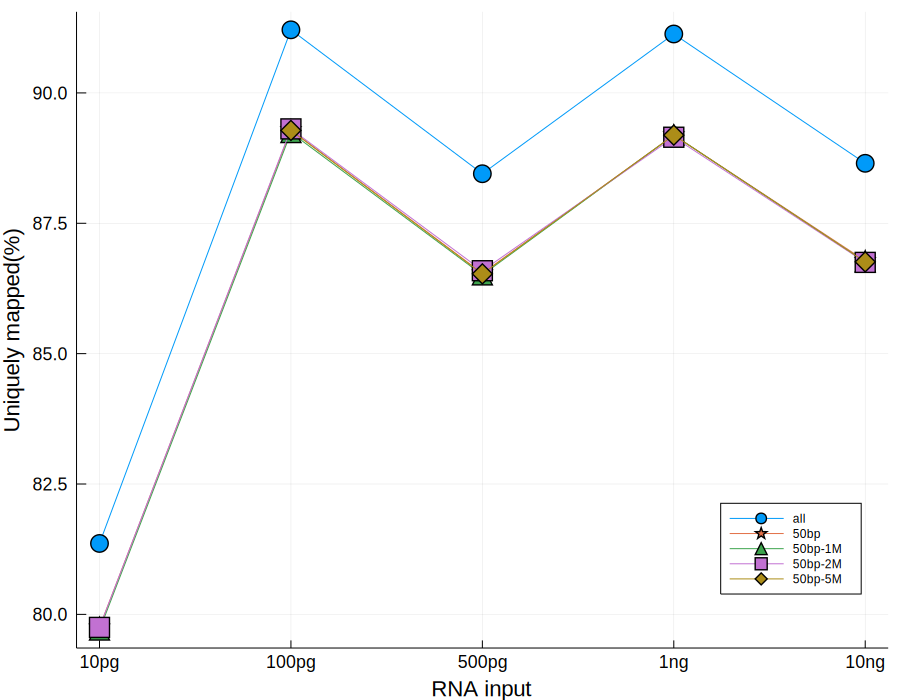

In [9]:
#filter(:treatment => ==("all"), rd58_df2)
newColumn = parse.(Float64, replace.(rd58_df2[!, "uniquely_mapped"], r"%" => ""))
lastGroup = pushfirst!(Array{Any, 1}(newColumn[21:24]), missing)

@df rd58_df2 plot(inputs,
    [newColumn[1:5], newColumn[6:10], newColumn[11:15], newColumn[16:20], lastGroup],
    label = ["all" "50bp" "50bp-1M" "50bp-2M" "50bp-5M"],
    shape = [:circle :star5 :utriangle :rect :diamond ],
    legend = :bottomright,
    size=(900,700),
    xlabel = "RNA input", ylabel = "Uniquely mapped(%)",
    xtickfontsize=12, ytickfontsize=12,
    guidefont=font(15),
    m = (1, 10)
)

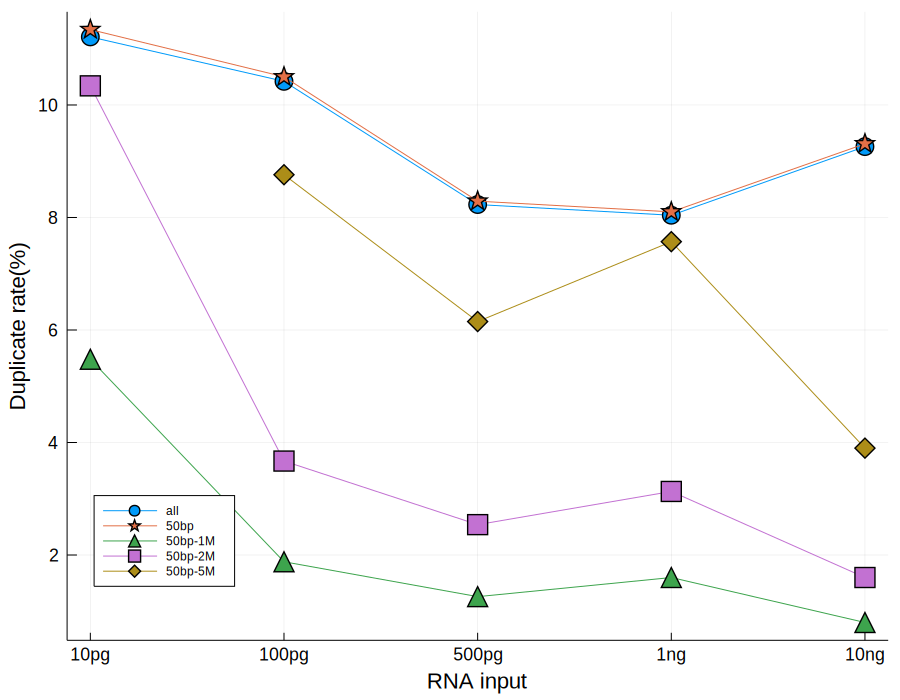

In [10]:
newColumn = parse.(Float64, replace.(rd58_df2[!, "duplicate_rate"], r"%" => ""))
lastGroup = pushfirst!(Array{Any, 1}(newColumn[21:24]), missing)

@df rd58_df2 plot(inputs,
    [newColumn[1:5], newColumn[6:10], newColumn[11:15], newColumn[16:20], lastGroup],
    label = ["all" "50bp" "50bp-1M" "50bp-2M" "50bp-5M"],
    shape = [:circle :star5 :utriangle :rect :diamond ],
    legend = :bottomleft,
    size=(900,700),
    xlabel = "RNA input", 
    ylabel = "Duplicate rate(%)",
    xtickfontsize=12, ytickfontsize=12,
    guidefont=font(15),
    m = (1, 10)
)

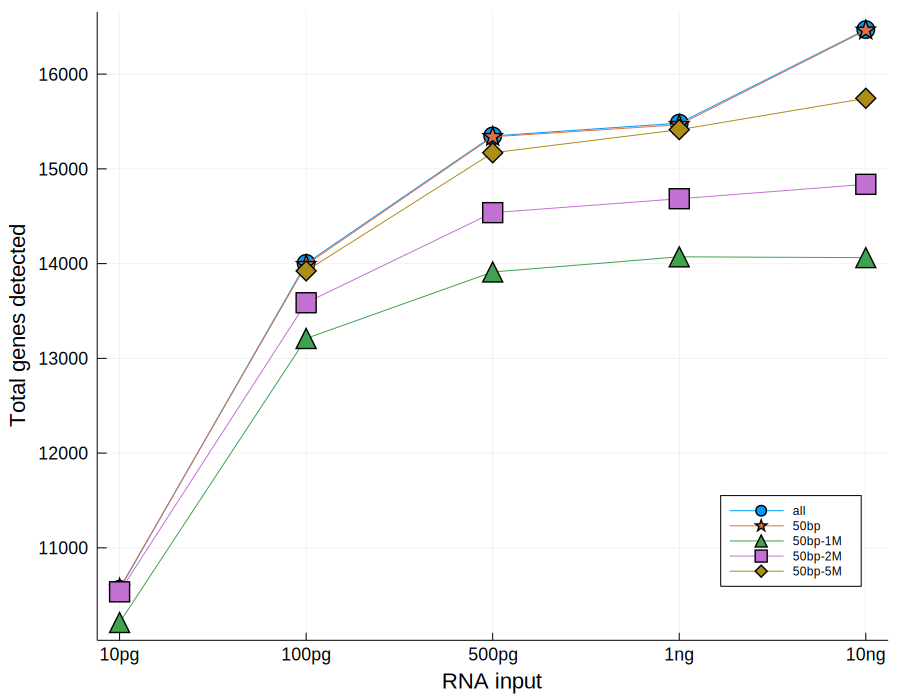

In [11]:
#filter(:treatment => ==("all"), rd58_df2)
newColumn = rd58_df2[!, "protein-coding_gene_mapped(21859)"]
lastGroup = pushfirst!(Array{Any, 1}(newColumn[21:24]), missing)

@df rd58_df2 plot(inputs,
    [newColumn[1:5], newColumn[6:10], newColumn[11:15], newColumn[16:20], lastGroup],
    label = ["all" "50bp" "50bp-1M" "50bp-2M" "50bp-5M"],
    shape = [:circle :star5 :utriangle :rect :diamond ],
    #color = [:white :white :white :white :white],
    legend = :bottomright,
    size=(900,700),
    xlabel = "RNA input", 
    ylabel = "Total genes detected",
    xtickfontsize=12, ytickfontsize=12,
    guidefont=font(15),
    m = (1, 10)
)

# Read alignment tables of R&D59

In [12]:
#do the work for R&D59 as above
rd59_df = DataFrame(CSV.File("S94_RD59_stat_summary.xls"))
rd59_50bp_df = DataFrame(CSV.File("S94_RD59_50bp_stat_summary.xls"))
rd59_50bp_1m_df = DataFrame(CSV.File("S94_RD59_50bp_1M_stat_summary.xls"))
rd59_50bp_2m_df = DataFrame(CSV.File("S94_RD59_50bp_2M_stat_summary.xls"))
rd59_50bp_5m_df = DataFrame(CSV.File("S94_RD59_50bp_5M_stat_summary.xls"))

,sample,species,reads,ribo_reads,ercc_reads,ercc_reads(%)
,String,String,Int64,String,String,String
1,RD59-1-ng_S4_50bp_5M_L002,Homo_sapiens,5000000,NA,NA,NA
2,RD59-10-pg_S1_50bp_5M_L002,Homo_sapiens,5000000,NA,NA,NA
3,RD59-100-pg_S2_50bp_5M_L002,Homo_sapiens,5000000,NA,NA,NA
4,RD59-25-ng_S5_50bp_5M_L002,Homo_sapiens,5000000,NA,NA,NA
5,RD59-500-pg_S3_50bp_5M_L002,Homo_sapiens,5000000,NA,NA,NA


# A summary table of R&D59

In [13]:
rd59_df = vcat(rd59_df, rd59_50bp_df, rd59_50bp_1m_df, rd59_50bp_2m_df, rd59_50bp_5m_df)
rd59_df[!, "sample"]  = replace.(replace.(replace.(rd59_df[!, "sample"], r"_L002" => ""), r"-ng" => "ng"), r"-pg" => "pg")
myOrder2 = [
     "RD59-10pg_S1",
     "RD59-100pg_S2",
     "RD59-500pg_S3",
     "RD59-1ng_S4",
     "RD59-25ng_S5",
    
     "RD59-10pg_S1_50bp",
     "RD59-100pg_S2_50bp",
     "RD59-500pg_S3_50bp",
     "RD59-1ng_S4_50bp",
     "RD59-25ng_S5_50bp",
    
     "RD59-10pg_S1_50bp_1M",
     "RD59-100pg_S2_50bp_1M",
     "RD59-500pg_S3_50bp_1M",
     "RD59-1ng_S4_50bp_1M",
     "RD59-25ng_S5_50bp_1M",

     "RD59-10pg_S1_50bp_2M",
     "RD59-100pg_S2_50bp_2M",
     "RD59-500pg_S3_50bp_2M",
     "RD59-1ng_S4_50bp_2M",
     "RD59-25ng_S5_50bp_2M",

     "RD59-10pg_S1_50bp_5M",
     "RD59-100pg_S2_50bp_5M",
     "RD59-500pg_S3_50bp_5M",
     "RD59-1ng_S4_50bp_5M",
     "RD59-25ng_S5_50bp_5M",
]
rd59_df = rd59_df[indexin(myOrder2, rd59_df.sample),:]
#CSV.write("./S59.txt", rd59_df)

,sample,species,reads,ribo_reads,ercc_reads,ercc_reads(%)
,String,String,Int64,String,String,String
1,RD59-10pg_S1,Homo_sapiens,11787482,NA,NA,NA
2,RD59-100pg_S2,Homo_sapiens,15932075,NA,NA,NA
3,RD59-500pg_S3,Homo_sapiens,7778651,NA,NA,NA
4,RD59-1ng_S4,Homo_sapiens,9324827,NA,NA,NA
5,RD59-25ng_S5,Homo_sapiens,16158726,NA,NA,NA
6,RD59-10pg_S1_50bp,Homo_sapiens,11787482,NA,NA,NA
7,RD59-100pg_S2_50bp,Homo_sapiens,15932075,NA,NA,NA
8,RD59-500pg_S3_50bp,Homo_sapiens,7778651,NA,NA,NA
9,RD59-1ng_S4_50bp,Homo_sapiens,9324827,NA,NA,NA


In [14]:
treatments = ["all", "50bp", "50bp-1M", "50bp-2M", "50bp-5M"]
cases = [i for i in treatments for j in 1:5]
insertcols!(rd59_df, 2, "treatment" => cases)

inputs = ["10pg", "100pg", "500pg", "1ng", "25ng"]
input_column = repeat(inputs, 5)
insertcols!(rd59_df, 3, "input" => input_column)
rd59_df

,sample,treatment,input,species,reads,ribo_reads,ercc_reads
,String,String,String,String,Int64,String,String
1,RD59-10pg_S1,all,10pg,Homo_sapiens,11787482,NA,NA
2,RD59-100pg_S2,all,100pg,Homo_sapiens,15932075,NA,NA
3,RD59-500pg_S3,all,500pg,Homo_sapiens,7778651,NA,NA
4,RD59-1ng_S4,all,1ng,Homo_sapiens,9324827,NA,NA
5,RD59-25ng_S5,all,25ng,Homo_sapiens,16158726,NA,NA
6,RD59-10pg_S1_50bp,50bp,10pg,Homo_sapiens,11787482,NA,NA
7,RD59-100pg_S2_50bp,50bp,100pg,Homo_sapiens,15932075,NA,NA
8,RD59-500pg_S3_50bp,50bp,500pg,Homo_sapiens,7778651,NA,NA
9,RD59-1ng_S4_50bp,50bp,1ng,Homo_sapiens,9324827,NA,NA


# Plots of S59

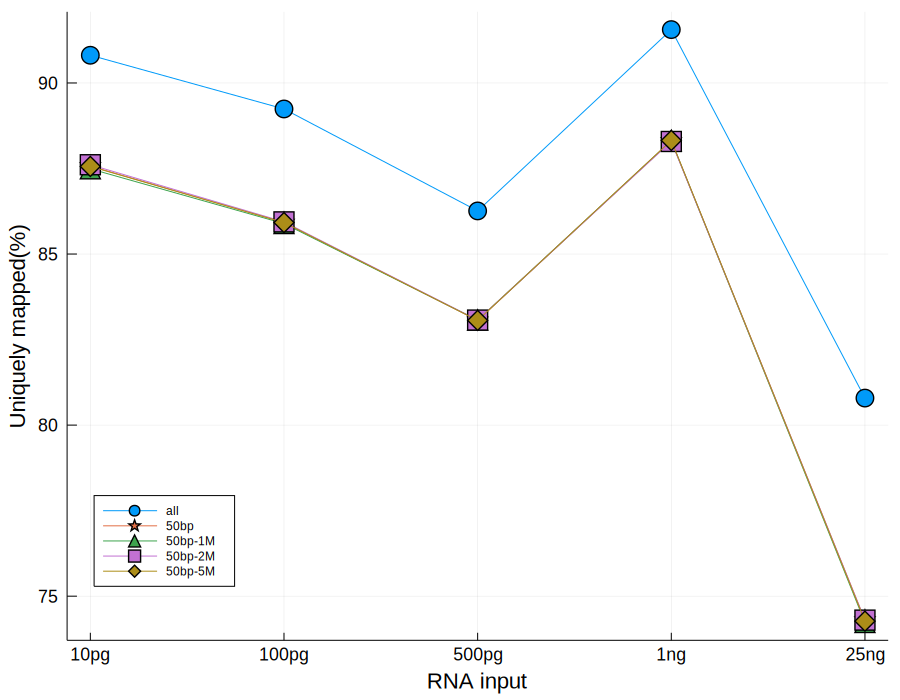

In [15]:
newColumn = parse.(Float64, replace.(rd59_df[!, "uniquely_mapped"], r"%" => ""))

@df rd59_df plot(inputs,
    [newColumn[1:5], newColumn[6:10], newColumn[11:15], newColumn[16:20], newColumn[21:25]],
    label = ["all" "50bp" "50bp-1M" "50bp-2M" "50bp-5M"],
    shape = [:circle :star5 :utriangle :rect :diamond ],
    legend = :bottomleft,
    size=(900,700),
    xlabel = "RNA input", 
    ylabel = "Uniquely mapped(%)",
    xtickfontsize=12, ytickfontsize=12,
    guidefont=font(15),
    m = (1, 10)
)

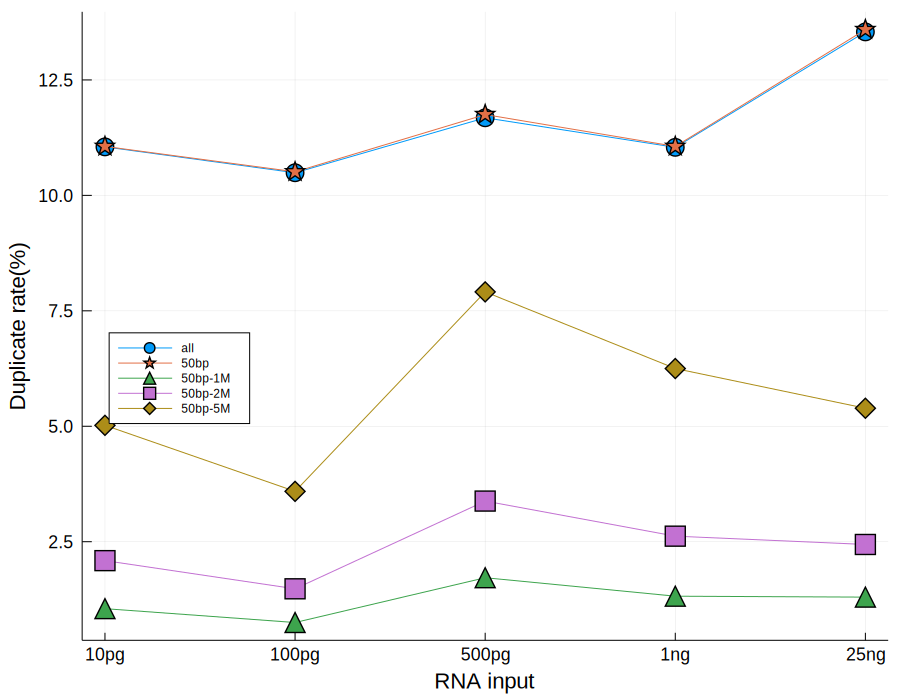

In [16]:
newColumn = parse.(Float64, replace.(rd59_df[!, "duplicate_rate"], r"%" => ""))

@df rd59_df plot(inputs,
    [newColumn[1:5], newColumn[6:10], newColumn[11:15], newColumn[16:20], newColumn[21:25]],
    label = ["all" "50bp" "50bp-1M" "50bp-2M" "50bp-5M"],
    shape = [:circle :star5 :utriangle :rect :diamond ],
    size=(900,700),
    legend = :left,
    xlabel = "RNA input", 
    ylabel = "Duplicate rate(%)",
    xtickfontsize=12, ytickfontsize=12,
    guidefont=font(15),
    m = (1, 10)
)

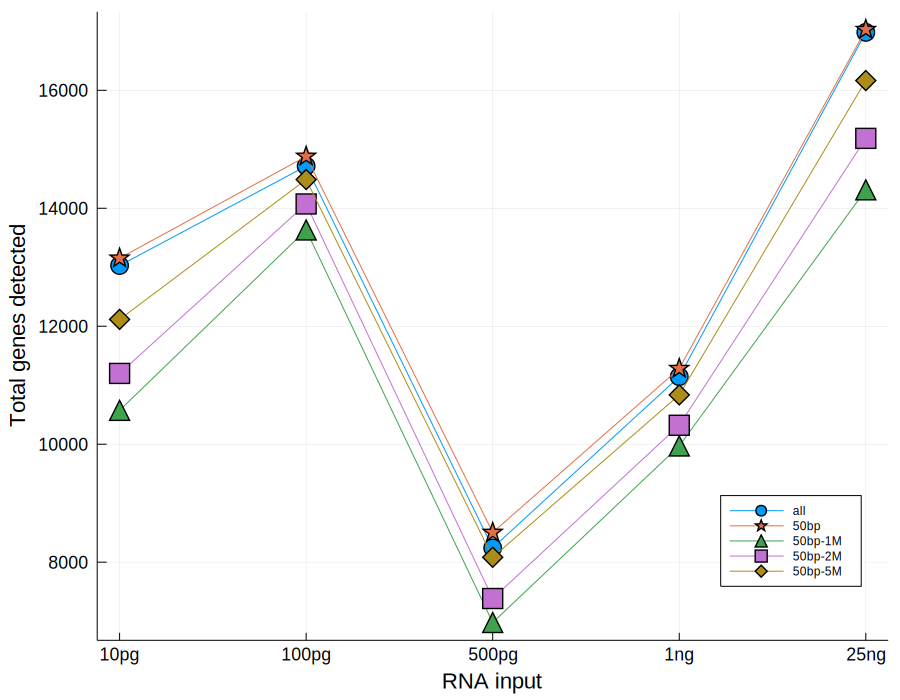

In [17]:
newColumn = rd59_df[!, "protein-coding_gene_mapped(19954)"]

@df rd59_df plot(inputs,
    [newColumn[1:5], newColumn[6:10], newColumn[11:15], newColumn[16:20], newColumn[21:25]],
    label = ["all" "50bp" "50bp-1M" "50bp-2M" "50bp-5M"],
    shape = [:circle :star5 :utriangle :rect :diamond ],
    legend = :bottomright,
    size=(900,700),
    xlabel = "RNA input", 
    ylabel = "Total genes detected",
    xtickfontsize=12, ytickfontsize=12,
    guidefont=font(15),
    m = (1, 10)
)

Summary:
Read length impacts 'unique mapping';
Read number impacts 'duplicate' and 'genes detected';
RNA input impacts 'genes detected' as well.

# Plots of the '150bp' groups in R&D58 and R&D59

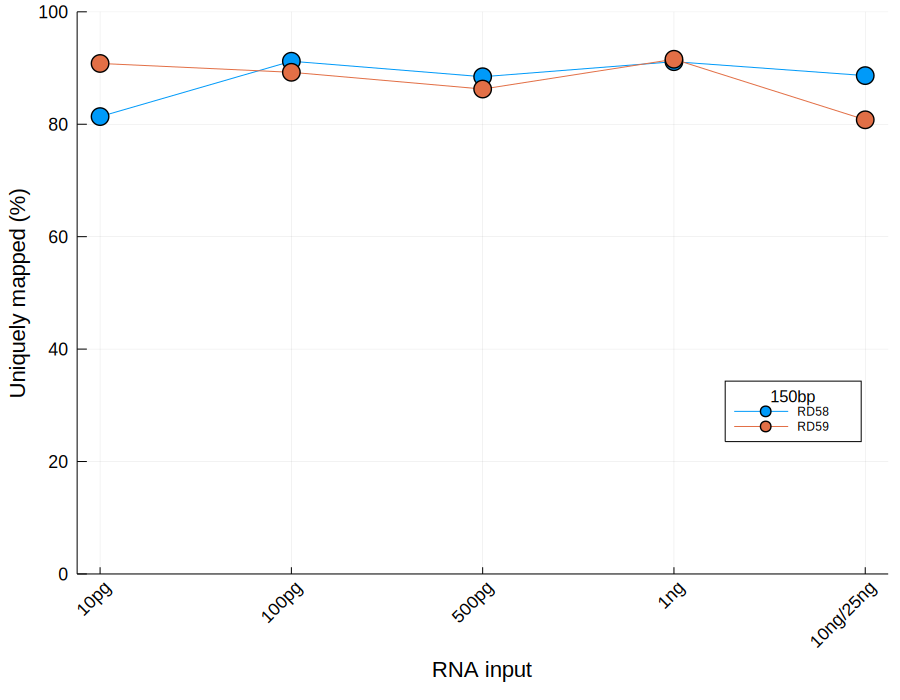

In [18]:
rd58_150bp_unique = rd58_df[!, ["sample", "uniquely_mapped"]][1:5, :]
rd59_150bp_unique = rd59_df[!, ["sample", "uniquely_mapped"]][1:5, :]
rd_150bp_unique_merge = hcat(rd58_150bp_unique, rd59_150bp_unique, makeunique=true)

unique1 = parse.(Float64, replace.(rd_150bp_unique_merge[!, "uniquely_mapped"], r"%" => ""))
unique2 = parse.(Float64, replace.(rd_150bp_unique_merge[!, "uniquely_mapped_1"], r"%" => ""))

plot([unique1, unique2], 
    marker = :circle,
    xlabel = "RNA input", 
    ylabel = "Uniquely mapped (%)", 
    ylim = (0, 100),
    label = ["RD58" "RD59"],
    size=(900,700),
    legend=:right,
    legendtitle = "150bp",
    xrotation = 45,
    xticks = (1:5, ("10pg", "100pg", "500pg", "1ng", "10ng/25ng")),
    xtickfontsize=12, ytickfontsize=12,
    guidefont=font(15),
    m = (1, 10)
)

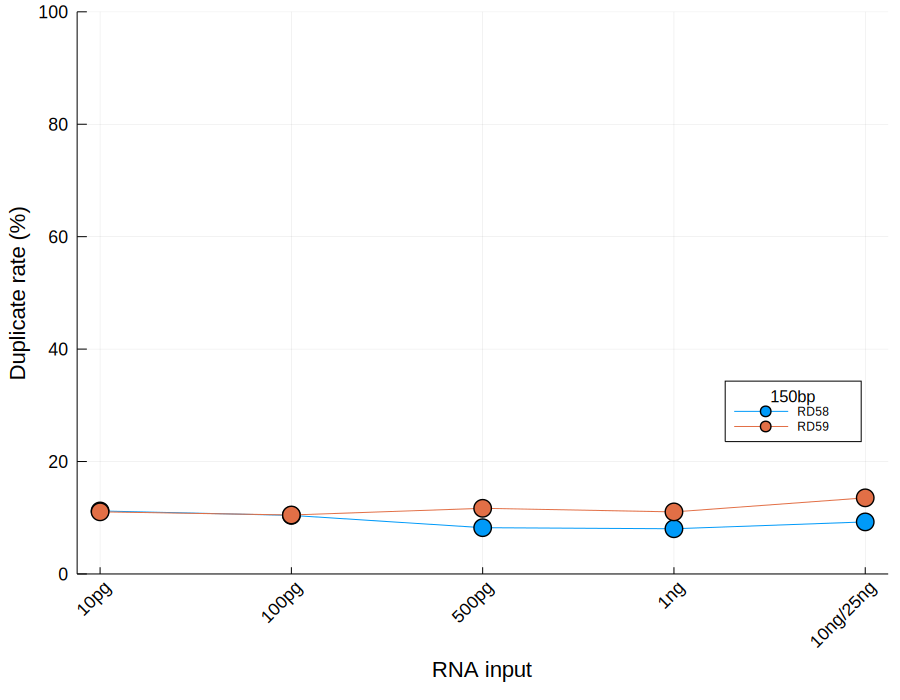

In [19]:
rd58_150bp_duplicate = rd58_df[!, ["sample", "duplicate_rate"]][1:5, :]
rd59_150bp_duplicate = rd59_df[!, ["sample", "duplicate_rate"]][1:5, :]
rd_150bp_duplicate_merge = hcat(rd58_150bp_duplicate, rd59_150bp_duplicate, makeunique=true)

duplicate1 = parse.(Float64, replace.(rd_150bp_duplicate_merge[!, "duplicate_rate"], r"%" => ""))
duplicate2 = parse.(Float64, replace.(rd_150bp_duplicate_merge[!, "duplicate_rate_1"], r"%" => ""))

plot([duplicate1, duplicate2], 
    marker = :circle,
    xlabel = "RNA input", 
    ylabel = "Duplicate rate (%)", 
    ylim = (0, 100),
    label = ["RD58" "RD59"],
    legend=:right,
    legendtitle = "150bp",
    size=(900,700),
    xrotation = 45,
    xticks = (1:5, ("10pg", "100pg", "500pg", "1ng", "10ng/25ng")),
    xtickfontsize=12, ytickfontsize=12,
    guidefont=font(15),
    m = (1, 10)
)

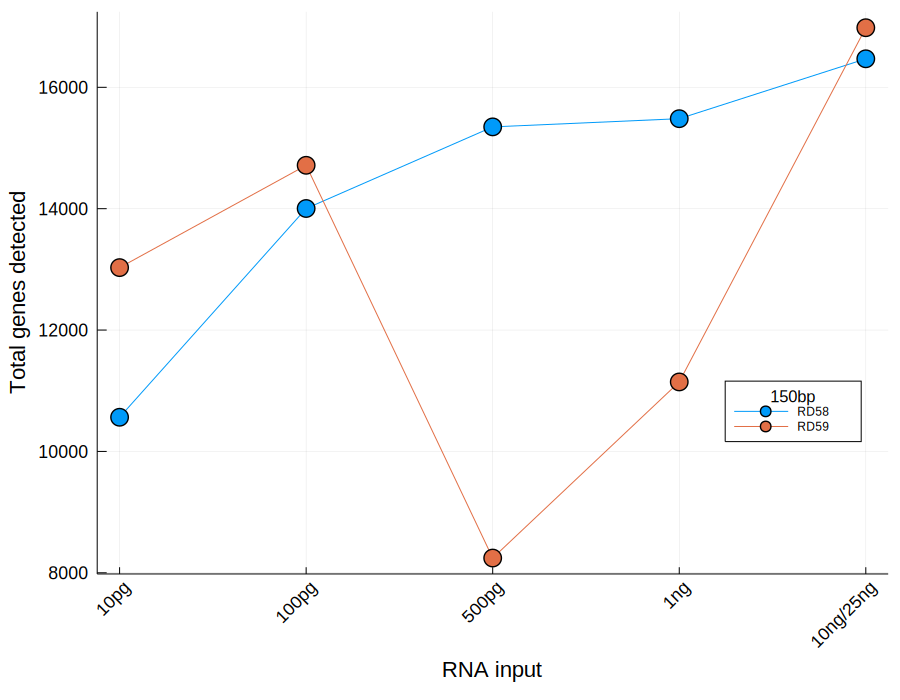

In [20]:
rd58_150bp_gene = rd58_df[!, ["sample", "protein-coding_gene_mapped(21859)"]][1:5, :]
rd59_150bp_gene = rd59_df[!, ["sample", "protein-coding_gene_mapped(19954)"]][1:5, :]
rd_150bp_gene_merge = hcat(rd58_150bp_gene, rd59_150bp_gene, makeunique=true)

gene1 = rd_150bp_gene_merge[!, "protein-coding_gene_mapped(21859)"]
gene2 = rd_150bp_gene_merge[!, "protein-coding_gene_mapped(19954)"]

plot([gene1, gene2], 
    marker = :circle,
    xlabel = "RNA input", 
    ylabel = "Total genes detected", 
    label = ["RD58" "RD59"],
    legend=:right,
    legendtitle = "150bp",
    size=(900,700),
    xrotation = 45,
    xticks = (1:5, ("10pg", "100pg", "500pg", "1ng", "10ng/25ng")),
    xtickfontsize=12, ytickfontsize=12,
    guidefont=font(15),
    m = (1, 10)
)

# Plots of the '50bp' groups in R&D58 and R&D59

In [21]:
rd58_50bp_gene = rd58_df[!, ["sample", "treatment", "input", "protein-coding_gene_mapped(21859)"]][6:end, :]
rd59_50bp_gene = rd59_df[!, ["sample", "treatment", "input", "protein-coding_gene_mapped(19954)"]][6:end, :]
rd_50bp_gene_merge = hcat(rd58_50bp_gene, rd59_50bp_gene, makeunique=true)

,sample,treatment,input,protein-coding_gene_mapped(21859),sample_1
,String?,String,String,Int64?,String
1,RD58-10pg_S6_50bp,50bp,10pg,10573,RD59-10pg_S1_50bp
2,RD58-100pg_S7_50bp,50bp,100pg,13988,RD59-100pg_S2_50bp
3,RD58-500pg_S8_50bp,50bp,500pg,15339,RD59-500pg_S3_50bp
4,RD58-1ng_S9_50bp,50bp,1ng,15466,RD59-1ng_S4_50bp
5,RD58-10ng_S10_50bp,50bp,10ng,16462,RD59-25ng_S5_50bp
6,RD58-10pg_S6_50bp_1M,50bp-1M,10pg,10212,RD59-10pg_S1_50bp_1M
7,RD58-100pg_S7_50bp_1M,50bp-1M,100pg,13210,RD59-100pg_S2_50bp_1M
8,RD58-500pg_S8_50bp_1M,50bp-1M,500pg,13912,RD59-500pg_S3_50bp_1M
9,RD58-1ng_S9_50bp_1M,50bp-1M,1ng,14072,RD59-1ng_S4_50bp_1M


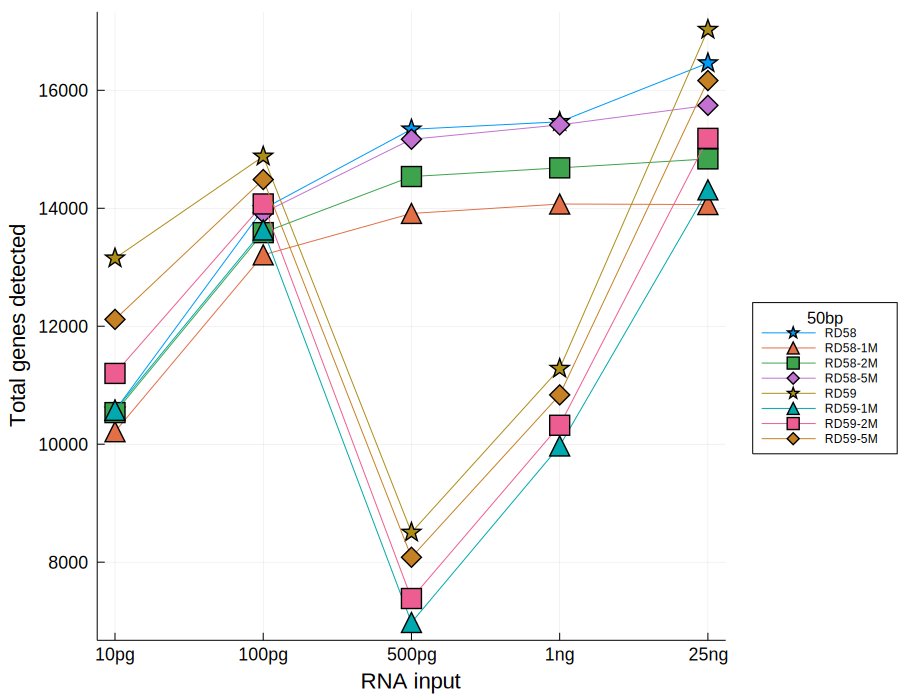

In [22]:
#pyplot()
newColumn1 = rd_50bp_gene_merge[!, "protein-coding_gene_mapped(21859)"]
newColumn2 = rd_50bp_gene_merge[!, "protein-coding_gene_mapped(19954)"]

@df rd_50bp_gene_merge plot(inputs,
    [newColumn1[1:5], newColumn1[6:10], newColumn1[11:15], newColumn1[16:20]],
    label = ["RD58" "RD58-1M" "RD58-2M" "RD58-5M"],
    shape = [:star5 :utriangle :rect :diamond ],
    legend = :outerright,
    size=(900,700),
    xlabel = "RNA input", 
    ylabel = "Total genes detected",
    xtickfontsize=12, ytickfontsize=12,
    guidefont=font(15),
    m = (1, 10)
)

@df rd_50bp_gene_merge plot!(inputs,
    [newColumn2[1:5], newColumn2[6:10], newColumn2[11:15], newColumn2[16:20]],
    label = ["RD59" "RD59-1M" "RD59-2M" "RD59-5M"],
    shape = [:star5 :utriangle :rect :diamond ],
    #markercolor = :transparent,
    legend = :outerright,
    legendtitle = "50bp",
    size=(900,700),
    xlabel = "RNA input", 
    ylabel = "Total genes detected",
    xtickfontsize=12, ytickfontsize=12,
    guidefont=font(15),
    m = (1, 10)
)